# Load and Explore the Data

In [2]:
import pandas as pd

df = pd.read_csv("heart_disease.csv")  # Adjust filename if needed
print(df.info())  # Check data types and missing values
print(df.describe())  # Statistical summary
print(df.head())  # View the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.

# Data Preprocessing

In [4]:
print(df.columns)  # List all column names

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [5]:
df.columns = df.columns.str.strip().str.lower()  # Removes spaces and converts to lowercase
print(df.columns)  # Verify cleaned column names


Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'st slope', 'target'],
      dtype='object')


In [7]:
df.columns = df.columns.str.replace(' ', '', regex=True)  # Remove spaces from column names
print(df.columns)  # Verify cleaned column names

Index(['age', 'sex', 'chestpaintype', 'restingbps', 'cholesterol',
       'fastingbloodsugar', 'restingecg', 'maxheartrate', 'exerciseangina',
       'oldpeak', 'stslope', 'target'],
      dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['chestpaintype', 'restingecg', 'stslope'], drop_first=True)


In [10]:
# Standardizing numerical columns
scaler = StandardScaler()
num_cols = ['age', 'restingbps', 'cholesterol', 'maxheartrate', 'oldpeak']  # Adjust names if needed
df[num_cols] = scaler.fit_transform(df[num_cols])

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection & Training

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9033613445378151
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       112
           1       0.93      0.88      0.91       126

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.91      0.90      0.90       238



# Model Evaluation

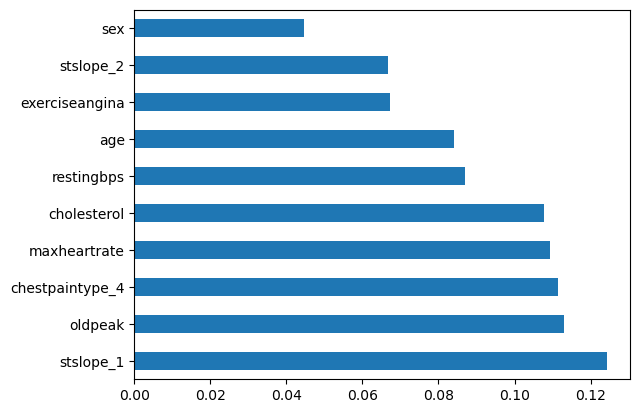

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

# Saving The Model and Scalar

In [14]:
import pickle

# Save the model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model (for testing)
with open('heart_disease_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [18]:
print("Scaler mean:", scaler.mean_)  # Check if scaler has learned values
print("Scaler var:", scaler.var_)


Scaler mean: [0.0182364  0.75630252 0.01164775 0.02530884 0.20483193 0.00277565
 0.38865546 0.02449315 0.17962185 0.24369748 0.51890756 0.15546218
 0.2762605  0.43697479 0.49264706 0.06932773]
Scaler var: [1.01068862 0.18430902 1.02482471 0.96605073 0.16287581 0.99359781
 0.23760239 1.00301223 0.14735784 0.18430902 0.2496425  0.13129369
 0.19994064 0.24602782 0.24994593 0.0645214 ]


In [20]:
print("X_train shape:", X_train.shape)


X_train shape: (952, 16)


In [24]:
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on training data

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler has been fitted and saved successfully!")

✅ Scaler has been fitted and saved successfully!
